## Diamond Price Prediction Project

This project involves predicting diamond prices using a dataset that encompasses various attributes
* The Clarity category is arranged in the following order from lowest to highest:  (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
* The Clarity category is arranged in the following order from lowest to highest:  (J, I, H, G, F, E, D)
* Table refers to the width of the diamond's top in relation to its widest point

In [1]:
# Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data

Diamonds_Data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Discover the Data

In [3]:
# Printing the 10 rows of the data

Diamonds_Data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [4]:
# Data Info
Diamonds_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Getting the unique categorical data

c1 = Diamonds_Data["color"].unique()
c2 = Diamonds_Data["cut"].unique()
c3 = Diamonds_Data["clarity"].unique()

print("Diamonds Color: {}".format(c1))
print("Diamonds Cut: {}".format(c2))
print("Diamonds Clarity: {}".format(c3))

Diamonds Color: ['E' 'I' 'J' 'F' 'H' 'D' 'G']
Diamonds Cut: ['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
Diamonds Clarity: ['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


In [6]:
# Data description
Diamonds_Data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Checking if data has Null values

Diamonds_Data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## Visualize the Data

[Text(0.5, 1.0, 'Clarity Counts')]

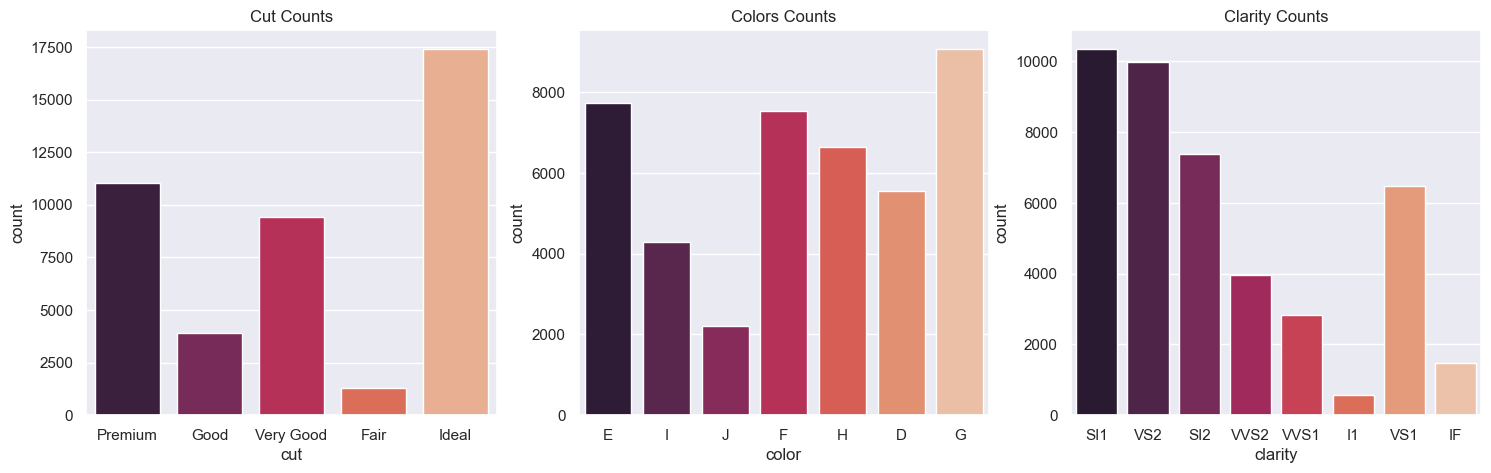

In [8]:
# Plottingg the count of every category

fig, axs = plt.subplots(ncols = 3, figsize=(18, 5))
sns.countplot(x='cut',data= Diamonds_Data, ax=axs[0], palette = "rocket").set(title='Cut Counts')
sns.countplot(x='color',data= Diamonds_Data, ax=axs[1], palette = "rocket").set(title='Colors Counts')
sns.countplot(x='clarity',data= Diamonds_Data, ax=axs[2], palette = "rocket").set(title='Clarity Counts')

# Note: The colors below do not represent the lowest or highest values, they are solely for presentation purposes.


Note

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

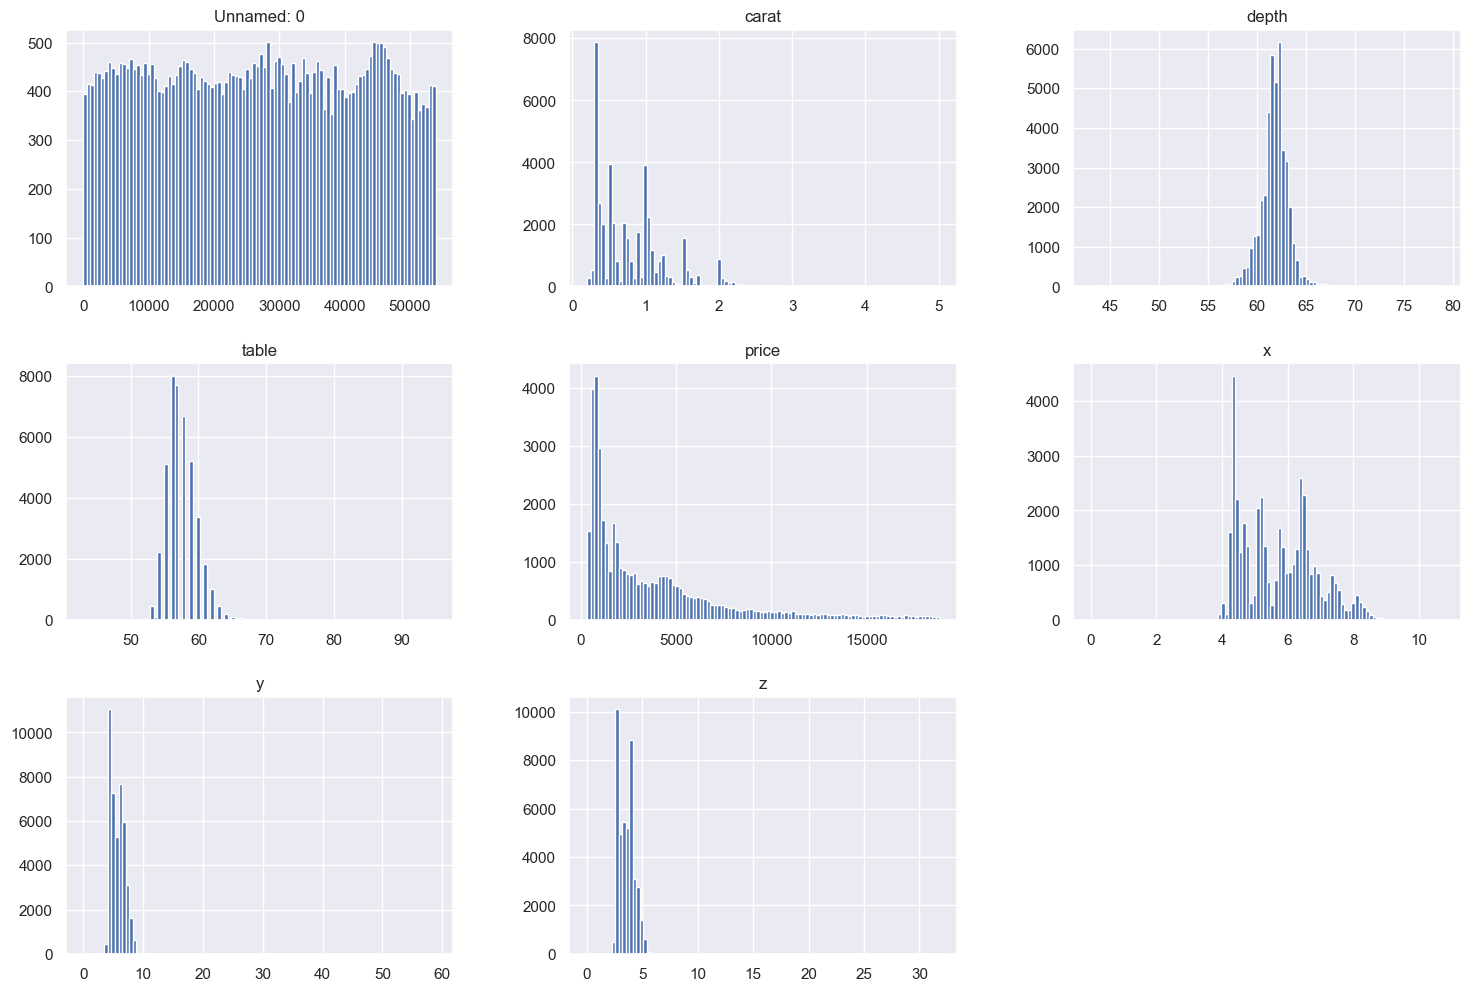

In [9]:
# Checking Normality
Diamonds_Data.hist(bins=100, figsize=(18,12))

In [10]:
# Speartting the numerical data from the categorical one

Numerical_Data = Diamonds_Data.drop(["cut", "clarity", "color"], axis = 1)
Numerical_Data.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,2,0.21,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,62.3,57.0,336,3.95,3.98,2.47


In [11]:
# Finding Correlation

Correlation = Numerical_Data.corr()
Correlation

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


<Axes: >

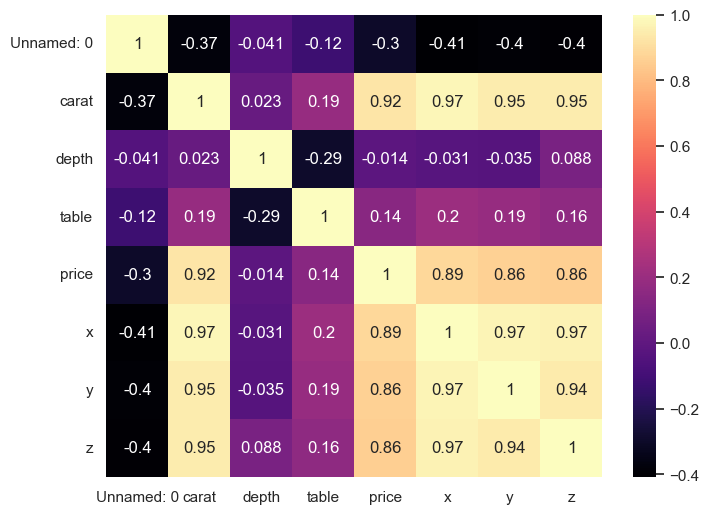

In [12]:
# Visualization Correlation

plt.figure(figsize = (8, 6))
sns.heatmap(Correlation, cmap = "magma", annot = True)

In [13]:
# Arranging the correlation with the price of diamonds in a descending sequence

Correlation["price"].sort_values(ascending = False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

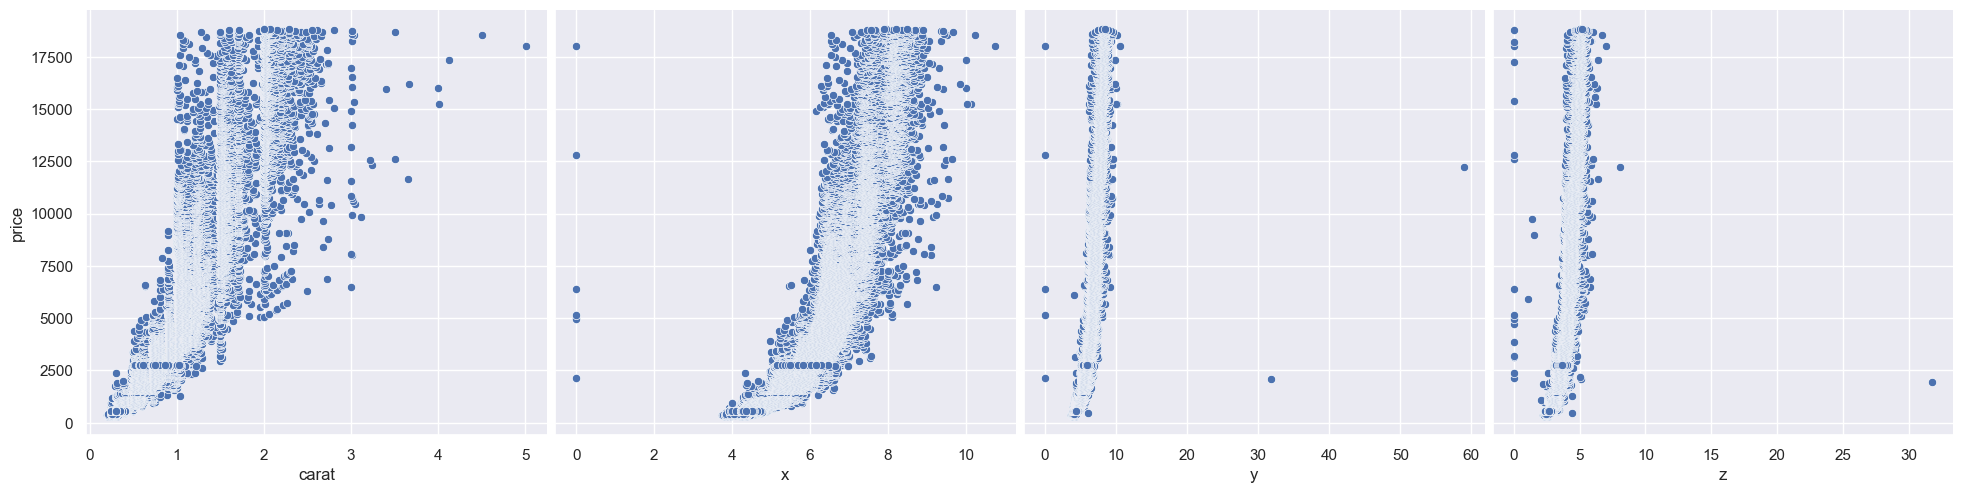

In [14]:
# Discovering Outliers
# Visualizing the price of diamonds with the most correlated attributes

sns.pairplot(Diamonds_Data, y_vars = ["price"], x_vars = ["carat", "x", "y", "z"], height = 5)

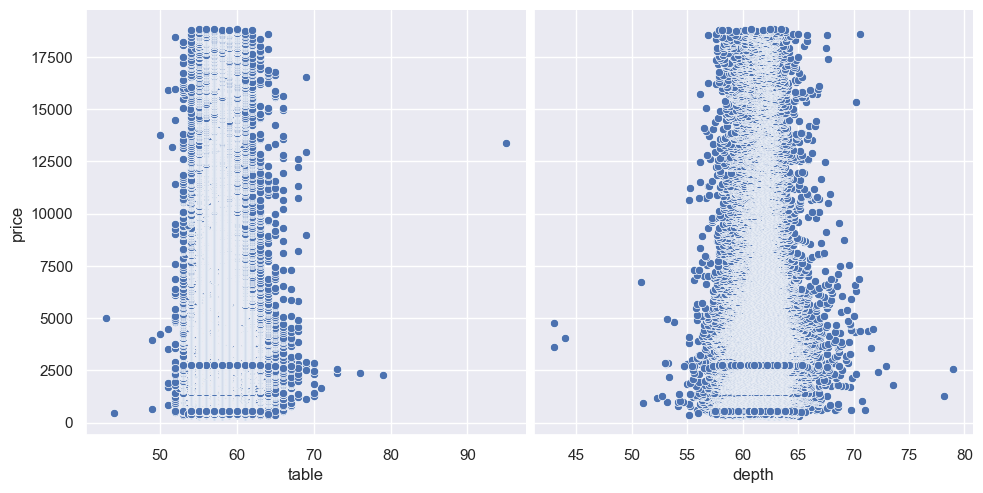

In [15]:
sns.pairplot(Diamonds_Data, y_vars = ["price"], x_vars = ["table", "depth"], height = 5)

## Preprocessing the Data

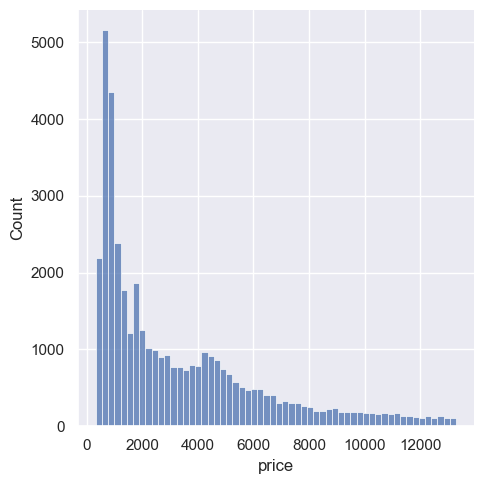

In [16]:
# Removing Outliers

Quan = Diamonds_Data["price"].quantile(0.95)
New_Data = Diamonds_Data[Diamonds_Data["price"] < Quan]
sns.displot(New_Data["price"])


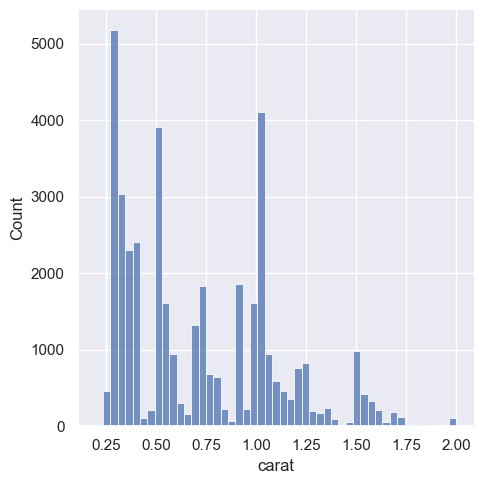

In [17]:
# Removing Outiers for Carat

New_Data = New_Data.drop(New_Data[New_Data["carat"] > 2].index)
sns.displot(New_Data["carat"])

<Axes: xlabel='carat', ylabel='price'>

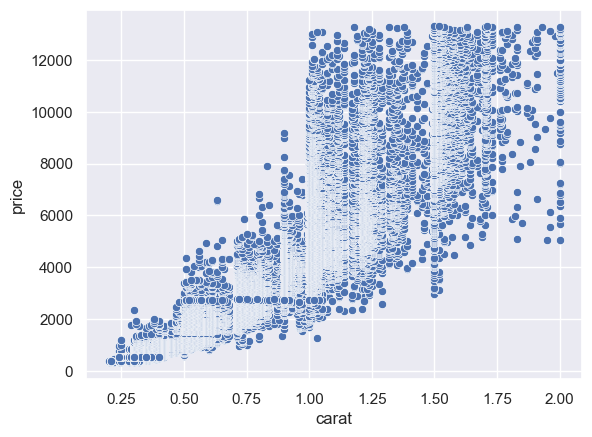

In [18]:
# Price & Carat after removing Outliers

sns.scatterplot(x = New_Data["carat"], y = New_Data["price"])

In [19]:
# Removing Outliers from X, Y, Z

New_Data = New_Data.drop(New_Data[New_Data["x"] > 10].index)
New_Data.drop(New_Data[New_Data["x"] < 3].index, inplace=True)
New_Data.drop(New_Data[New_Data["y"] > 9].index, inplace=True)
New_Data.drop(New_Data[New_Data["z"] > 5].index, inplace=True)
New_Data.drop(New_Data[New_Data["z"] < 2].index, inplace=True)
New_Data.drop(New_Data[New_Data["table"] > 70].index, inplace=True)
New_Data.drop(New_Data[New_Data["depth"] > 75].index, inplace=True)
New_Data.drop(New_Data[New_Data["table"] < 50].index, inplace=True)
New_Data.drop(New_Data[New_Data["depth"] < 53].index, inplace=True)

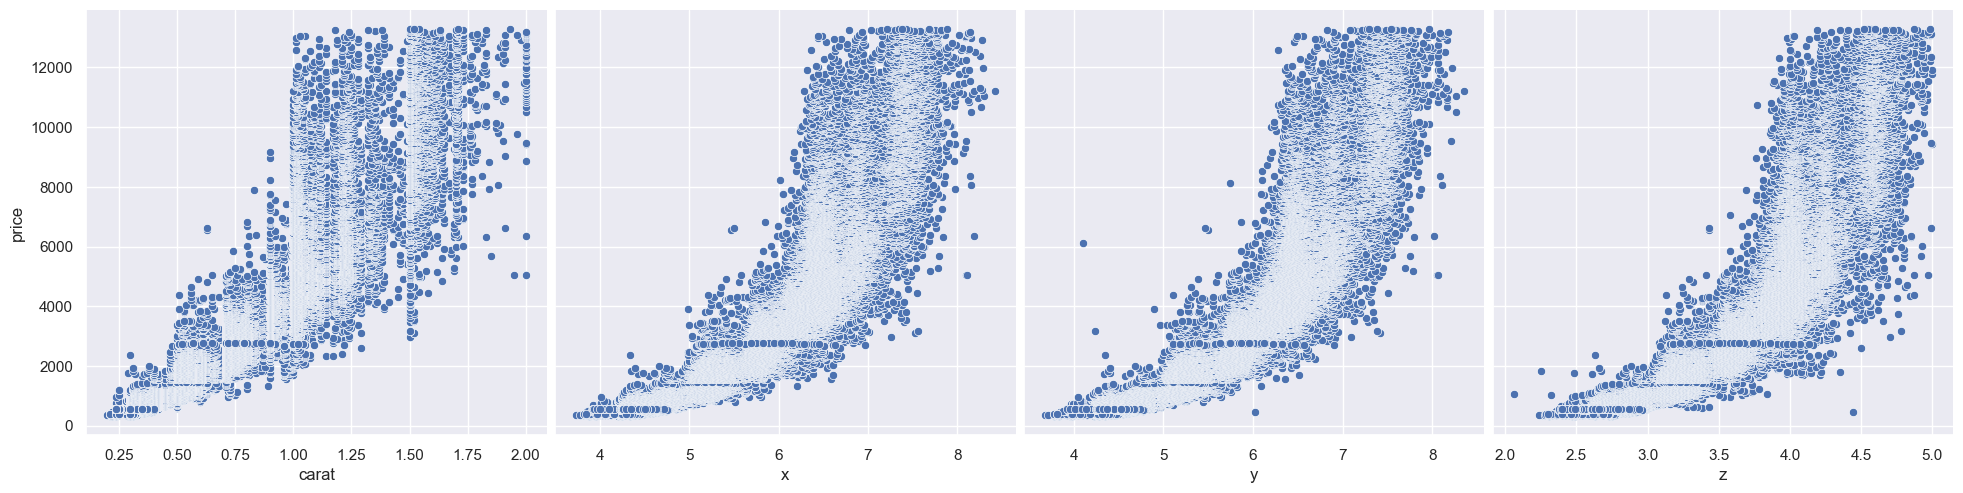

In [20]:
sns.pairplot(New_Data, y_vars = ["price"], x_vars = ["carat", "x", "y", "z"], height = 5)

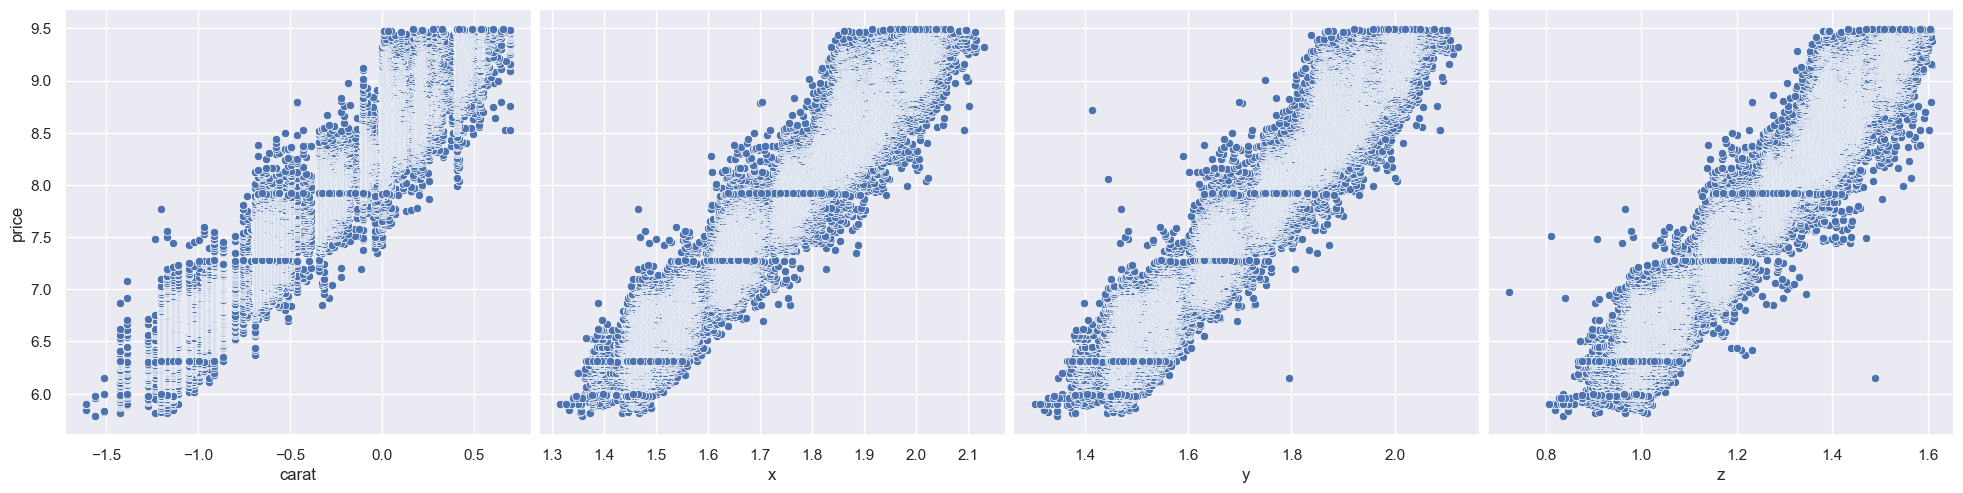

In [21]:
# Applying Log Transformation

log_data = New_Data.drop(["cut", "clarity", "color"], axis = 1) 
log_data = np.log(log_data)
sns.pairplot(log_data, y_vars = ["price"], x_vars = ["carat", "x", "y", "z"], height = 5) 

In [22]:
New_Data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [23]:
log_data["cut"] = New_Data["cut"]
log_data["color"] = New_Data["color"]
log_data["clarity"] = New_Data["clarity"]


In [24]:
log_data.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.693147,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248,Premium,E,SI1
1,1.386294,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984,Premium,I,VS2
2,1.609438,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601,Good,J,SI2
3,1.791759,-1.427116,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259,Very Good,J,VVS2
4,1.945910,-1.427116,4.131961,4.043051,5.817111,1.373716,1.381282,0.904218,Very Good,I,VVS1


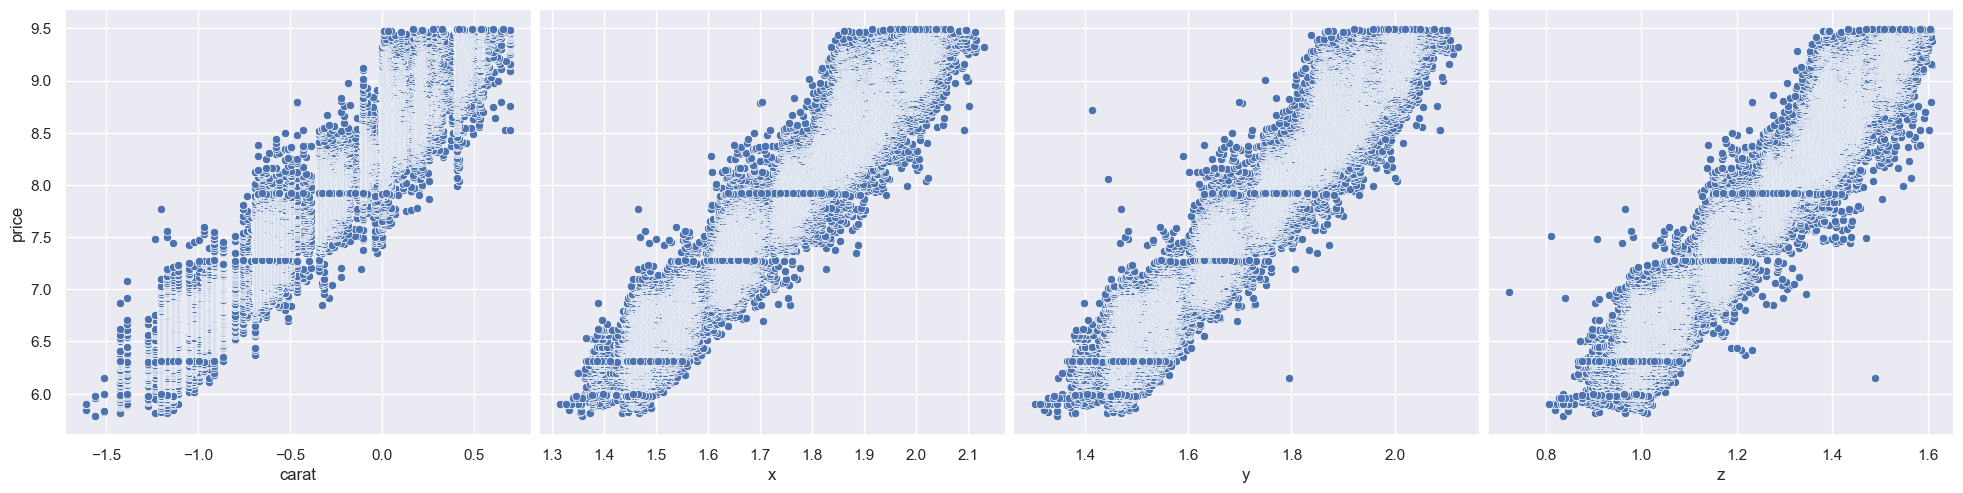

In [25]:
sns.pairplot(log_data, y_vars = ["price"], x_vars = ["carat", "x", "y", "z"], height = 5) 

In [26]:
# Feature Engineering

log_data["Volume"] = log_data.x * log_data.y * log_data.z
log_data = log_data.drop(['x','y','z'], axis=1) 

test_data['volume'] = test_data.x * test_data.y * test_data.z
test_data = test_data.drop(['x','y','z'], axis=1)

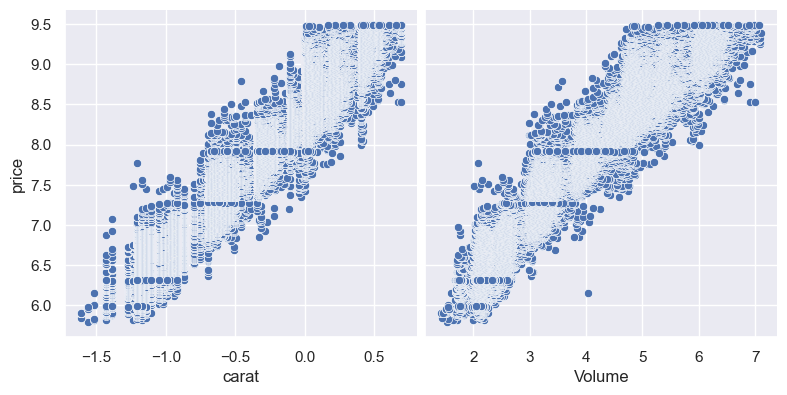

In [27]:
sns.pairplot(log_data, y_vars = ["price"], x_vars = ["carat", "Volume"], height = 4)

In [28]:
# Convert the Price to float

log_data["price"] = log_data["price"].astype(float)
log_data.dtypes

Unnamed: 0    float64
carat         float64
depth         float64
table         float64
price         float64
cut            object
color          object
clarity        object
Volume        float64
dtype: object

In [29]:
# Sperate the Price from the data

Y = log_data["price"]
processed_data = log_data.drop(["price"], axis = 1)
processed_data.head()


,Unnamed: 0,carat,depth,table,cut,color,clarity,Volume
0,0.693147,-1.560648,4.091006,4.110874,Premium,E,SI1,1.530239
1,1.386294,-1.237874,4.133565,4.060443,Premium,I,VS2,2.001349
2,1.609438,-1.171183,4.147885,4.060443,Good,J,SI2,2.183069
3,1.791759,-1.427116,4.139955,4.043051,Very Good,J,VVS2,1.713956
4,1.945910,-1.427116,4.131961,4.043051,Very Good,I,VVS1,1.715743


#### Apply Ordinal Encoder to get rid of categorical data

In [30]:
cat_attribs = ["cut" ,"color" , "clarity"]
num_attribs = ["carat" ,"depth" ,"table" ,"Volume"] #"Unnamed: 0" ,

In [31]:
# Apply Column Transformer & Ordinal Encoder

Ordinal_En = ColumnTransformer([("cat", OrdinalEncoder(categories = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ['J','I','H','G','F','E','D'],
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2','VVS1', 'IF']]), cat_attribs),
    ("num", "passthrough", num_attribs)
])

Data = Ordinal_En.fit_transform(processed_data)

### Training the Model

In [32]:
# Split the data into training, validation and testing data

x_train, x, y_train, y = train_test_split(Data, Y, train_size = 0.7, random_state = 42)

x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape)

(28261, 7) (6056, 7) (6057, 7)


In [33]:
# define a function to predict the price data and calculate the accuracy

def Accuracies(trained_model):
    pred_data = trained_model.predict(x_val)    # Predict the data
    r2 = r2_score(pred_data, y_val)*100       # Calculate R2
    mse = mean_squared_error(pred_data, y_val, squared = False)
    rmse = np.sqrt(mse)                         # Calcultae RMSE
    print("\n**** Validation *****")
    print("R2: ", r2)
    print("RMSE: ", rmse)


names = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor"]
models = [LinearRegression(), DecisionTreeRegressor(ccp_alpha = 0.1),RandomForestRegressor()] 

# define a function to train more than one model

def Training (name, model) :
    training_model = model
    training_model.fit(x_train, y_train)
    Accuracies(training_model)


for name, model in zip(names, models):
    print("<<< ",name," >>>")
    Training(name, model)
    print("\n------------------------------\n")


<<<  Linear Regression  >>>

**** Validation *****
R2:  97.69197502057479
RMSE:  0.3740913007307491

------------------------------

<<<  Decision Tree Regressor  >>>

**** Validation *****
R2:  65.69311502968887
RMSE:  0.6887613344920104

------------------------------

<<<  Random Forest Regressor  >>>

**** Validation *****
R2:  98.58381725664314
RMSE:  0.3321001146935477

------------------------------



### Evaluation Using Cross-Validation

In [34]:
def CrossValidation (names, models):
    scores = cross_val_score(models, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
    tree_rmse_scores = np.sqrt(-scores)
    print("RMSE: ", tree_rmse_scores.mean())

for name, model in zip(names, models):
    print("<<< ",name," >>>")
    CrossValidation(name, model)
    print("\n------------------------------\n")

<<<  Linear Regression  >>>
RMSE:  0.13944737771309101

------------------------------

<<<  Decision Tree Regressor  >>>
RMSE:  0.47101804037295797

------------------------------

<<<  Random Forest Regressor  >>>
RMSE:  0.10914149736383169

------------------------------



### Fine-Tuning the Model

In [35]:
# Fine-Tuning the model using Grid Search

forest_reg = RandomForestRegressor()

param_grid = [
              {'n_estimators': [3,30,50], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True, refit=True)
grid_search.fit(x_train, y_train)

print("Best Params : ",grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Best Params :  {'max_features': 4, 'n_estimators': 50}
0.1309787714627347 {'max_features': 2, 'n_estimators': 3}
0.11068629158618509 {'max_features': 2, 'n_estimators': 30}
0.10976729448126828 {'max_features': 2, 'n_estimators': 50}
0.12135454895063294 {'max_features': 4, 'n_estimators': 3}
0.10868704251755736 {'max_features': 4, 'n_estimators': 30}
0.1079760330854574 {'max_features': 4, 'n_estimators': 50}
0.12198842338617102 {'max_features': 6, 'n_estimators': 3}
0.10967299096886265 {'max_features': 6, 'n_estimators': 30}
0.10895766343303398 {'max_features': 6, 'n_estimators': 50}
0.12152608910558095 {'max_features': 8, 'n_estimators': 3}
0.11014902107334636 {'max_features': 8, 'n_estimators': 30}
0.10953794640676069 {'max_features': 8, 'n_estimators': 50}
0.1324996291662731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.120645296088988 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.12708253010503584 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Test Data

In [36]:
# Apply Random Forest on Test data

rf_model= RandomForestRegressor(max_features= 8, n_estimators = 50)
rf_model.fit(x_train, y_train)

y_pred= rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred,squared = False)
rmse = np.sqrt(mse)

results_df = pd.DataFrame(
    data=[["Random Forest Model Tuned", r2_score(y_test, y_pred)*100, rmse]], 
    columns=['Model', 'R2', 'RMSE'])
results_df

,Model,R2,RMSE
0,Random Forest Model Tuned,98.623596,0.330034


### Conclusion
Based on the above value, it is evident that the Random Forest Regressor is the most appropriate for predicting the value of diamonds. So, after applying the regressor on the test data we found the difference in average between the estmiated values and the actual data is only *15.80*